# Sentiment Scores: Diaries

For system details and resources, see PhD_SystemCheck.ipynb and PhD_Modules.ipynb

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import word_tokenize

import pandas as pd
import re
import numpy as np

In [2]:
tokenizer = RegexpTokenizer('\w+')
sentenceTokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Load tokenizer
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

In [3]:
len(sentimentAnalyzer.lexicon)

7268

In [4]:
# Here I am writing the file to a csv to figure out what is missing.
#with open('20240331_PhD_VaderLexicon-mdcleaned.csv', 'w') as f:
    #[f.write('{0},{1}\n'.format(key, value)) for key, value in sentimentAnalyzer.lexicon.items()]

In [4]:
Corpus = PlaintextCorpusReader('20240628_PhD_Diaries', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

5

Make a new folder called "cleaned" in the letters folder for the output.

# Building / testing the text cleaning script

In [99]:
text = open("test/D0002.txt", "r")
text = text.read()
print(text)

"Charra"
Wednesday Nov 4th 1883 A nice cool 
day Mrs Roberts + I were talking nearly 
the whole night feel very tired today
Tom left just after breakfast for
 Mr Hiern's Station he will not be back
 until Sunday or Monday, he is talking
 of going out to the new Tanks over
 100 miles from here if he can make 
sure of getting water I Darned up the
 socks, + Stockings, I had with me + cut
 out some under clothes.
"Charra"
 Thursday Nov 8th North wind
first thing this morning with heavy
thunder but only a few drops of rain,
I was so sleepy did not get up till
very late had been hand sewing which
is very tiresome My throat keep very sore
still the Cold has not nearly left one
Worrier ill with cold our Black Boy
"Charra"
Friday Nov 9th We have had thunder
+ lightning with a little rain off + on all
day I have been sewing all day but Mrs
Roberts keeps me talking after going to bed
till all hours of the night so that I can't get
up in the morning, have had a head ache all
day from want of rest

In [100]:
text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
text = re.sub(r"(\[[^?]*?\])","", text) #Remove bracketed (i.e., transcriber) notes
text = re.sub(r"(\[)","", text) #Remove opening bracket
text = re.sub(r"(\?\])","", text) #Remove question mark and closing bracket
text = re.sub(r"(—){2,}"," ", text) # Replace 2 or more dashes with space
text = re.sub(r"(-){2,}"," ", text) # Replace 2 or more hyphens with space
text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
text = re.sub(r"(_)","", text) # Remove underscore
text = re.sub(r"([Ã,Â])","", text) # Remove special characters
text = re.sub(r"(£)"," pounds ", text) # Replace pound symbol with word
text = re.sub(r"( & )"," and ", text) # Replace ampersand with word
text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
text = re.sub(r"(\˙)","", text) # Remove dot
text = re.sub(r"(\#PAGE)","", text) #Remove #Page
text = re.sub(r"(\(sic\))","", text) #Remove #sic
text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
text = re.sub(r"(\/)","", text) # Remove backslash
text = re.sub(r"(^\s*)","", text) # Remove blank spaces at the start of the string
text = re.sub(r"(\s){2,}"," ", text) # Replace 2 or more white spaces with just one
text = re.sub(r"$","\n", text) # Ensure that there is a newline to the end of the string
text = re.sub(r"(\+)","and", text) # Replace blank lines with a single space
text = re.sub(r"(\\)","", text) #Remove opening slash
text = re.sub(r"(\/)","", text) #Remove closing slash thus leaving contents
text = re.sub(r"(₤)"," pounds ", text) # Replace lira symbol with word pounds
text = re.sub(r"(\")","", text) # Quotation marks
print(text)

Charra Wednesday Nov 4th 1883 A nice cool day Mrs Roberts and I were talking nearly the whole night feel very tired today Tom left just after breakfast for Mr Hiern's Station he will not be back until Sunday or Monday he is talking of going out to the new Tanks over 100 miles from here if he can make sure of getting water I Darned up the socks and Stockings I had with me and cut out some under clothes. Charra Thursday Nov 8th North wind first thing this morning with heavy thunder but only a few drops of rain I was so sleepy did not get up till very late had been hand sewing which is very tiresome My throat keep very sore still the Cold has not nearly left one Worrier ill with cold our Black Boy Charra Friday Nov 9th We have had thunder and lightning with a little rain off and on all day I have been sewing all day but Mrs Roberts keeps me talking after going to bed till all hours of the night so that I can't get up in the morning have had a head ache all day from want of rest and sittin

In [101]:
text = re.sub(r'[^\w\s]', '', text)
print(text)    

Charra Wednesday Nov 4th 1883 A nice cool day Mrs Roberts and I were talking nearly the whole night feel very tired today Tom left just after breakfast for Mr Hierns Station he will not be back until Sunday or Monday he is talking of going out to the new Tanks over 100 miles from here if he can make sure of getting water I Darned up the socks and Stockings I had with me and cut out some under clothes Charra Thursday Nov 8th North wind first thing this morning with heavy thunder but only a few drops of rain I was so sleepy did not get up till very late had been hand sewing which is very tiresome My throat keep very sore still the Cold has not nearly left one Worrier ill with cold our Black Boy Charra Friday Nov 9th We have had thunder and lightning with a little rain off and on all day I have been sewing all day but Mrs Roberts keeps me talking after going to bed till all hours of the night so that I cant get up in the morning have had a head ache all day from want of rest and sitting t

# Now calculate sentiment for the whole folder and the medium Vader lexicon

In [76]:
sentiment = pd.DataFrame(columns = ['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom


In [77]:
Corpus = PlaintextCorpusReader('20240628_PhD_Diaries', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

4

In [78]:
for fileid in Corpus.fileids(): # For each file in the corpus
    #Proprocess and save text
    f = open("20240628_PhD_Diaries/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(\[[^?]*?\])","", text) #Remove bracketed (i.e., transcriber) notes
    text = re.sub(r"(\[)","", text) #Remove opening bracket
    text = re.sub(r"(\?\])","", text) #Remove question mark and closing bracket
    text = re.sub(r"(—){2,}"," ", text) # Replace 2 or more dashes with space
    text = re.sub(r"(-){2,}"," ", text) # Replace 2 or more hyphens with space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(_)","", text) # Remove underscore
    text = re.sub(r"([Ã,Â])","", text) # Remove special characters
    text = re.sub(r"(£)"," pounds ", text) # Replace pound symbol with word
    text = re.sub(r"( & )"," and ", text) # Replace ampersand with word
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Remove dot
    text = re.sub(r"(\#PAGE)","", text) #Remove #Page
    text = re.sub(r"(\(sic\))","", text) #Remove #sic
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\/)","", text) # Remove backslash
    text = re.sub(r"(^\s*)","", text) # Remove blank spaces at the start of the string
    text = re.sub(r"(\s){2,}"," ", text) # Replace 2 or more white spaces with just one
    text = re.sub(r"(\+)","and", text) # Replace blank lines with a single space
    text = re.sub(r"(\\)","", text) #Remove opening slash
    text = re.sub(r"(\/)","", text) #Remove closing slash thus leaving contents
    text = re.sub(r"(₤)"," pounds ", text) # Replace lira symbol with word pounds
    text = re.sub(r"(\")","", text) # Quotation marks
    text = re.sub(r"$","\n", text) # Ensure that there is a newline to the end of the string
    f.write(text)
    f.close()
    # Now basic metrics
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    # Now score sentiment
    sentences = sentenceTokenizer.tokenize(text) # Place sentences into a list called "sentences"
    scoreNeg = 0.0
    scoreNeu = 0.0
    scorePos = 0.0
    scoreCom = 0.0
    #sequence = 0 # Create a counter to keep track of sentence order
    for sentence in sentences: # For each sentence in the letter 
        #sequence +=1 # Counter updater
        scores = sentimentAnalyzer.polarity_scores(sentence) # Calculate sentiment scores
        scoreNeg += scores["neg"]
        scoreNeu += scores["neu"]
        scorePos += scores["pos"]
        scoreCom += scores["compound"]
    scoreNeg = scoreNeg / len(sentences)
    scoreNeu = scoreNeu / len(sentences)
    scorePos = scorePos / len(sentences)
    scoreCom = scoreCom / len(sentences)
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scoreNeg, scoreNeu, scorePos, scoreCom], index=['text','docid', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom'])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    print(fileid) # Show progress
print("done")

D0002.txt
D0003.txt
D0007.txt
D0009.txt
done


In [79]:
sentiment.head()

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
0,Charra Wednesday Nov 4th 1883 A nice cool day ...,D0002.txt,81551,6885,0.084426,0.057039,0.89367,0.049316,-0.178757
1,May 6th Very wet morning it has stopped me fro...,D0003.txt,19635,1939,0.098752,0.02814,0.916614,0.053863,0.070318
2,Diary of Capt. John Hart 1865 1 January 1 Sund...,D0007.txt,54919,6332,0.115297,0.050477,0.896772,0.052744,-0.017036
3,Edith Gwynne July 14 71 Glynde Place July 17 B...,D0009.txt,28146,5644,0.200526,0.039007,0.910292,0.050688,0.025624


In [80]:
# What is the overall shape of the dataframe
sentiment.shape

(4, 9)

In [81]:
# What are the data types
sentiment.dtypes

text                object
docid               object
totalTokens         object
uniqueTokens        object
lexicalDiversity    object
scoreNeg            object
scoreNeu            object
scorePos            object
scoreCom            object
dtype: object

In [82]:
# Change a few to continuous date (float) 
cols = ['lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']
sentiment[cols] = sentiment[cols].apply(pd.to_numeric, errors='coerce', axis=1)
sentiment.dtypes

text                 object
docid                object
totalTokens          object
uniqueTokens         object
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
dtype: object

In [83]:
# Change a couple of others to discrete data (integer)
sentiment['totalTokens'] = sentiment['totalTokens'].astype(int)
sentiment['uniqueTokens'] = sentiment['uniqueTokens'].astype(int)
sentiment.dtypes

text                 object
docid                object
totalTokens           int64
uniqueTokens          int64
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
dtype: object

In [84]:
sentiment['scoreCom'].describe()

count    4.000000
mean    -0.024963
std      0.108556
min     -0.178757
25%     -0.057467
50%      0.004294
75%      0.036797
max      0.070318
Name: scoreCom, dtype: float64

<Axes: >

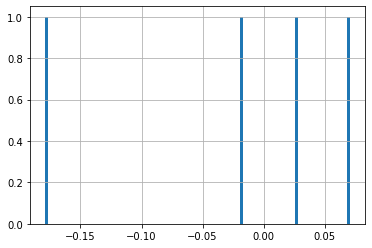

In [85]:
sentiment['scoreCom'].hist(bins=100)

The distribution is not meaningfull with such a small number of observations. But's let's see who the negative outlier is.

In [86]:
sentiment.loc[sentiment['scoreCom'] < -0.15]

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
0,Charra Wednesday Nov 4th 1883 A nice cool day ...,D0002.txt,81551,6885,0.084426,0.057039,0.89367,0.049316,-0.178757


Ok, this makes sense.

In [87]:
#sentiment.iloc[1,0] 

In [88]:
sumVal = sentiment['scoreNeg'] + sentiment['scoreNeu'] + sentiment['scorePos']
sumVal

0    1.000024
1    0.998617
2    0.999993
3    0.999987
dtype: float64

Sums of ratio type variables is adding up as it should to about 1.

<Axes: >

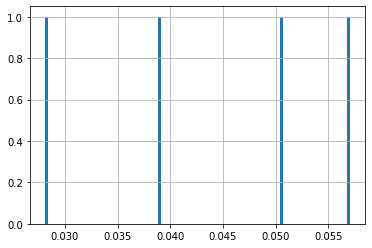

In [89]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

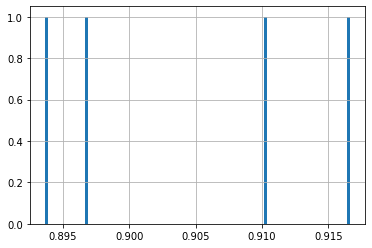

In [90]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

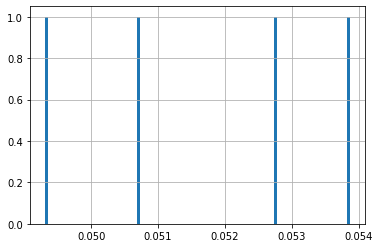

In [91]:
sentiment['scorePos'].hist(bins=100)

In [92]:
# Remove the .txt from the file name
sentiment['docid'] = sentiment['docid'].str.replace(r'.txt', '', regex=True)
sentiment

,text,docid,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
0,Charra Wednesday Nov 4th 1883 A nice cool day ...,D0002,81551,6885,0.084426,0.057039,0.893670,0.049316,-0.178757
1,May 6th Very wet morning it has stopped me fro...,D0003,19635,1939,0.098752,0.028140,0.916614,0.053863,0.070318
2,Diary of Capt. John Hart 1865 1 January 1 Sund...,D0007,54919,6332,0.115297,0.050477,0.896772,0.052744,-0.017036
3,Edith Gwynne July 14 71 Glynde Place July 17 B...,D0009,28146,5644,0.200526,0.039007,0.910292,0.050688,0.025624


In [93]:
#sentiment['text'][7]

## Summary Stats

In [94]:
sentiment.describe()

,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
count,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,46062.7500,5200.000000,0.124750,0.043666,0.904337,0.051652,-0.024963
std,28031.4404,2232.480384,0.052068,0.012754,0.010912,0.002039,0.108556
min,19635.0000,1939.000000,0.084426,0.028140,0.893670,0.049316,-0.178757
25%,26018.2500,4717.750000,0.095171,0.036291,0.895996,0.050345,-0.057467
50%,41532.5000,5988.000000,0.107025,0.044742,0.903532,0.051716,0.004294
75%,61577.0000,6470.250000,0.136604,0.052117,0.911873,0.053024,0.036797
max,81551.0000,6885.000000,0.200526,0.057039,0.916614,0.053863,0.070318


In [96]:
#print(len(sentiment.loc[sentiment['totalTokens'] < 86])/len(sentiment))
#print(len(sentiment.loc[sentiment['totalTokens'] > 250])/len(sentiment))

In [97]:
sentiment.text[3]

"Edith Gwynne July 14 71 Glynde Place July 17 Black Monday Julia left us this morning with the intention of going home Willie returned from Poll's went to school. The glass stands at much rain I have now three broods of turkeys one of 9 one of 7 and one of 4. Also two hens sitting on eleven eggs each they commenced to us on the 13 Mr Furguson's wedding day. July 19 A nasty cold rainy day. Losses still continue among the turkeys. I sat a turkey on 13 ducks eggs and a hen on 7 so altogether I have about 44 eggs in the process of hatching July 20 Polly came in the morning to stay sill to worr as she is not going to the ball at Government House on account of not being well. I walk up to the lore meet Emily Bakewell. she is rather disappointed not to go the ball to night Very cold and turkies dying daily July 21 I do a little painting in my crest Album and then we all turn out for a walk to pick up oranges. Polly goes home taking queeny with her. Heyne sends some plants for Papa among them 

## Export

In [98]:
sentiment.to_csv('20240628_PhD_SentimentDiaries.csv', index = True, encoding="utf-8", lineterminator='\r\n')

The CSV displays improperly in excel because of the 32,767 character limit for cells. https://support.microsoft.com/en-us/office/excel-specifications-and-limits-1672b34d-7043-467e-8e27-269d656771c3

I am not going to worry about this because the dataframes work correctly in Python and R.